# Importing Libraries

In [53]:
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers
import os
import pandas as pd
from sklearn import model_selection
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.datasets import load_files
from sklearn import naive_bayes
from sklearn.preprocessing import LabelEncoder
import xgboost
import matplotlib.pyplot as plt

# Data Loading

In [54]:
df=pd.read_csv('../dataset/nepali_ds.csv')
print(df)

                                                   Text        Labels
0     घर जग्गा कारोबारमा आत्मविश्वास गुमेको वर्ष"बैं...  ArthaBanijya
1     सहायताको प्राथमिकता तोक्न आयोजना बैंकप्राथमिकत...  ArthaBanijya
2     व्यापारीको बेइमानीले सर्वसाधारणलाई सास्तीपेट्र...  ArthaBanijya
3     मोबाइल सेट आयातमा टाइप एप्रुभल लागूसरकारले मोब...  ArthaBanijya
4      रारामा रिसोर्ट र पर्यटक सेवा केन्द्र बन्नेदेश...  ArthaBanijya
...                                                 ...           ...
9995  वर्षाबीच मन्डेलाको स्मृतिसभाविश्वमै स्वतन्त्रत...         Viswa
9996  हजारे फेरि अनशनमाभारतको संसद्को जारी सत्रबाटै ...         Viswa
9997  भारतमा सर्वोच्चद्वारा समलिंगी सम्बन्ध अवैध ठहर...         Viswa
9998  भारतका वरिष्ठ मन्त्रीद्वारा सर्वोच्चको विरोधसम...         Viswa
9999  अस्ट्रेलियामा पनि गैरकानुनीअस्ट्रेलियाको क्यान...         Viswa

[10000 rows x 2 columns]


In [75]:
# split the dataset into training and validation datasets 


train_x, valid_x, train_y, valid_y = model_selection.train_test_split(df['Text'], df['Labels'])



# Word Level tf-idf with naive bayes

In [76]:

# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(df['Text'])
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)

In [77]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid, is_neural_net=False):
    # fit the training dataset on the classifier
    hist=classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    
    return metrics.accuracy_score(predictions, valid_y),classifier, predictions,hist

In [78]:
# Naive Bayes on Word Level TF IDF Vectors

accuracy,model,pred,hist = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf, train_y, xvalid_tfidf)
print ("NB, WordLevel TF-IDF: ", accuracy)

NB, WordLevel TF-IDF:  0.7984


# Confusion Matrix

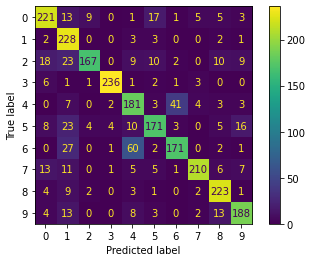

In [79]:

cm = confusion_matrix(valid_y, pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)

cm_display.plot()
plt.show()

In [83]:

Precision = metrics.precision_score(valid_y, pred, pos_label='positive',average='micro')
Sensitivity_recall = metrics.recall_score(valid_y, pred, pos_label='positive',average='micro')
F1_score = metrics.f1_score(valid_y, pred, pos_label='positive',average='micro')
print(Precision,Sensitivity_recall,F1_score)

0.7984 0.7984 0.7984


C:\Users\grish\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\grish\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\grish\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


# Latest Prediction

In [31]:
test=['२ पुस, काठमाडौं । चालु आर्थिक वर्ष (आव) २०८०/८१ को पहिलो पाँच महिना (साउन–मंसिर)को अवधिमै सरकारले १ यस वर्ष १७ खर्ब ५१ अर्ब ३१ करोड रुपैयाँको बजेट कार्यान्वयन गरिरहेको सरकारले ४ खर्ब ५२ अर्ब रुपैयाँ ऋण (आन्तरिक र बाह्य) उठाएर  जोहो गर्नुपर्ने हुन्छ ।']
test=tfidf_vect.transform(test)
model.predict(test)

array(['ArthaBanijya'], dtype='<U15')

# label encode the target variable 

In [84]:
encoder = LabelEncoder()

train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)

# Extereme Gradient Boosting on Word Level TF IDF Vectors

In [85]:

accuracy,model,pred,hist = train_model(xgboost.XGBClassifier(), xtrain_tfidf.tocsc(), train_y, xvalid_tfidf.tocsc())
print ("Xgb, WordLevel TF-IDF: ", accuracy)

Xgb, WordLevel TF-IDF:  0.8084


# Confusion Matrix

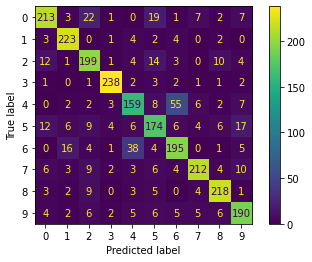

In [86]:
cm = confusion_matrix(valid_y, pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)

cm_display.plot()
plt.show()

In [87]:
Precision = metrics.precision_score(valid_y, pred, pos_label='positive',average='micro')
Sensitivity_recall = metrics.recall_score(valid_y, pred, pos_label='positive',average='micro')
F1_score = metrics.f1_score(valid_y, pred, pos_label='positive',average='micro')
print(Precision,Sensitivity_recall,F1_score)

0.8084 0.8084 0.8083999999999999


C:\Users\grish\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\grish\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\grish\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [52]:
test=['काठमाडौं । अमेरिकामै ‘बेबी प्लान’ गर्ने अभिनेत्री रेखा थापाको योजनालाई लिएर सामाजिक सञ्जाल विभाजित देखिएको छ । सामाजिक सञ्जाल प्रयोगकर्ताहरुले उनको पक्ष-विपक्षमा मत राखिरहेका छन् ।रेखा थापा जस्तो ठूलो सेलिब्रिटीले यस्तो निर्णय गर्दा समाजमा गलत सन्देश जाने आलोचकको तर्क छ । तर रेखा थापा व्यक्ति पनि भएको र उनको निजी अधिकारलाई सम्मान गर्नुपर्ने कतिपयको मत छ ।']
test=tfidf_vect.transform(test)
result=model.predict(test)
print(encoder.inverse_transform(result))

['SuchanaPrabidhi']
